In [1]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data acquisition

In [2]:
df = pd.read_csv('5-insurance_regression.csv')

# Analysis by describing data

### What are the features available in the dataset?

In [3]:
print('\033[94m\033[1mFeatures:\033[0m {}'.format(list(df.columns)))
print('\033[94m\033[1mDimension:\033[0m {}\n'.format(df.shape))

Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Dimension: (1338, 7)



### What are the datatypes for the features?

In [4]:
print('\033[94m\033[1mData Preview:\033[0m\n{}\n'.format(df.head()))
print('\033[94m\033[1mInformation:\033[0m'); df.info()

Data Preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can observe the following:  
**Categorical [Binary]:** Sex, Smoker  
**Categorical [Ordinal]:** Region  
**Numerical [Discrete]:** Age, Children   
**Numerical [Continuous]:** BMI, Charges  
**Strings [Object]:** Sex, Smoker, Region  
**Float:** BMI, Charges  
**Integer:** Age, Children

### Which features contain blank, null or empty values?

In [5]:
print('\033[94m\033[1mNull Data:\033[0m\n{}'.format(df.isnull().sum()))

Null Data:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Simple statistics on numerical features

In [6]:
print('\n\033[94m\033[1mNumerical Data:\033[0m\n{}'.format(df.describe()))
print('\n\033[94m\033[1mSkewness of Data:\033[0m\n{}'.format(df.skew(axis=0)))


Numerical Data:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Skewness of Data:
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


### Simple statistics on categorical features

In [7]:
print('\n\033[94m\033[1mCategorical Data:\033[0m\n{}\n'
      .format(df.describe(include=['O'])))
print('\033[94m\033[1mSex Distribution:\033[0m\n{} \
      \n\033[91mIn fractions:\033[0m\n{}\n'
      .format(df['sex'].value_counts(),
              df['sex'].value_counts(normalize=True)))
print('\033[94m\033[1mSmoker Distribution:\033[0m\n{} \
      \n\033[91mIn fractions:\033[0m\n{}\n'
      .format(df['smoker'].value_counts(),
              df['smoker'].value_counts(normalize=True)))
print('\033[94m\033[1mRegion Distribution:\033[0m\n{} \
      \n\033[91mIn fractions:\033[0m\n{}\n'
      .format(df['region'].value_counts(),
              df['region'].value_counts(normalize=True)))


Categorical Data:
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

Sex Distribution:
male      676
female    662
Name: sex, dtype: int64       
In fractions:
male      0.505232
female    0.494768
Name: sex, dtype: float64

Smoker Distribution:
no     1064
yes     274
Name: smoker, dtype: int64       
In fractions:
no     0.795217
yes    0.204783
Name: smoker, dtype: float64

Region Distribution:
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64       
In fractions:
southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64



In [8]:
df[df['sex'] == 'male'].mean()


age            38.917160
bmi            30.943129
children        1.115385
charges     13956.751178
dtype: float64

In [9]:
df['age_bin'] = pd.cut(x=df['age'], bins=[17, 25, 33, 41, 49, 57, 65])
df['bmi_bin'] = pd.cut(x=df['age'], bins=[15, 18.5,24.9,29.9,34.9,55],
                       labels=['underweight','normal','overweight','obese','extremely obese'])

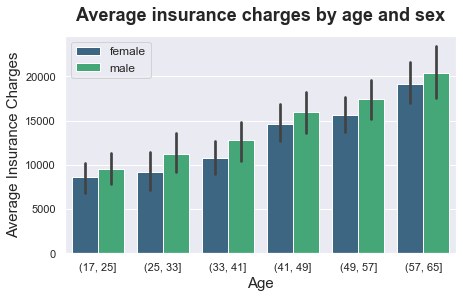

In [10]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='age_bin', y='charges', hue='sex', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by age and sex',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12)

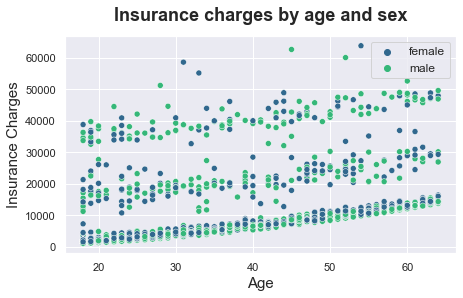

In [11]:
plt.figure(figsize = (7,4))
sns.set()
sns.scatterplot(x='age', y='charges', hue='sex', data=df, palette='viridis')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.title('Insurance charges by age and sex',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12)

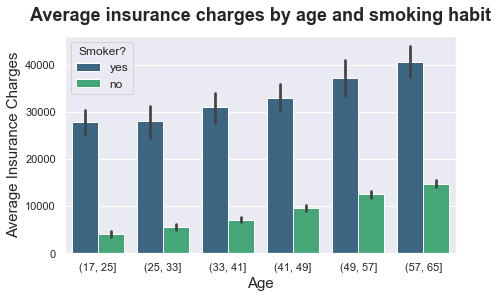

In [12]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='age_bin', y='charges', hue='smoker', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by age and smoking habit',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, title='Smoker?')

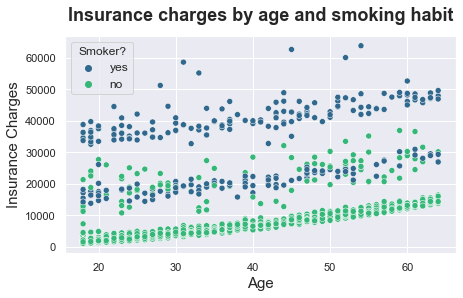

In [13]:
plt.figure(figsize = (7,4))
sns.set()
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='viridis')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.title('Insurance charges by age and smoking habit',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, title='Smoker?')

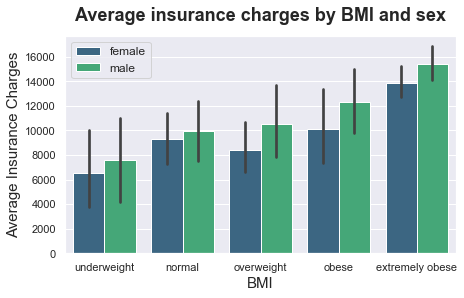

In [14]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='bmi_bin', y='charges', hue='sex', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by BMI and sex',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12)

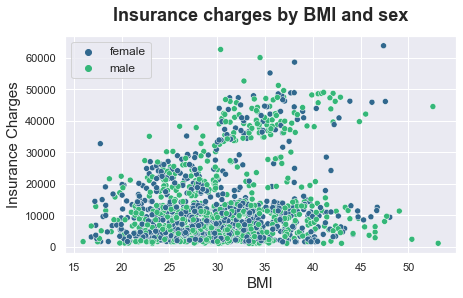

In [15]:
plt.figure(figsize = (7,4))
sns.set()
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df, palette='viridis')
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.title('Insurance charges by BMI and sex',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12)

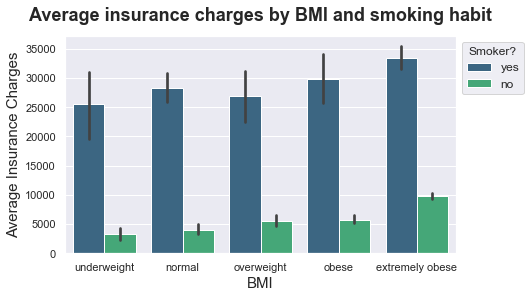

In [16]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='bmi_bin', y='charges', hue='smoker', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by BMI and smoking habit',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, title='Smoker?',
           loc='upper left',bbox_to_anchor=(1, 1))

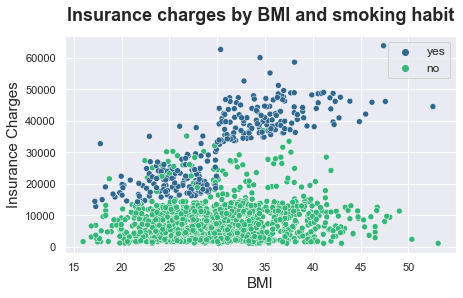

In [17]:
plt.figure(figsize = (7,4))
sns.set()
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='viridis')
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.title('Insurance charges by BMI and smoking habit',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12)

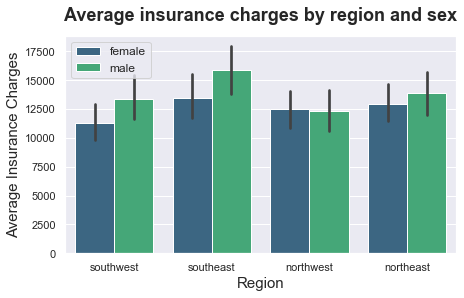

In [27]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='region', y='charges', hue='sex', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by region and sex',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, loc='upper left')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

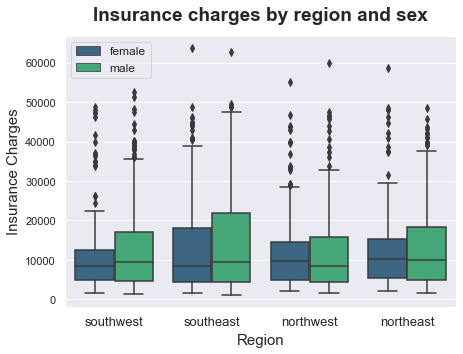

In [19]:
plt.figure(figsize = (7,5))
sns.set()
sns.boxplot(x="region", y="charges", hue="sex", data=df, palette='viridis')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.legend(fontsize=12)
#,bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Insurance charges by region and sex',fontsize=19,
             pad=15,weight='bold')
plt.xticks(fontsize=13)

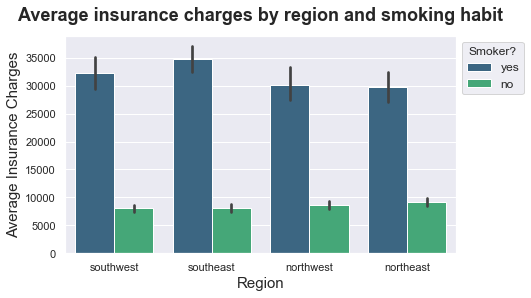

In [30]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='region', y='charges', hue='smoker', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by region and smoking habit',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, title='Smoker?',
           loc='upper left',bbox_to_anchor=(1, 1))

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

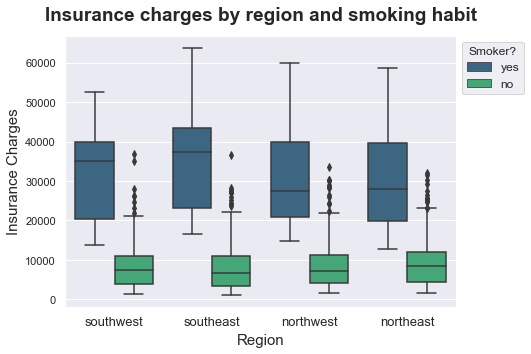

In [20]:
plt.figure(figsize = (7,5))
sns.set()
sns.boxplot(x="region", y="charges", hue="smoker", data=df, palette='viridis')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.legend(fontsize=12,title='Smoker?',
           loc='upper left',bbox_to_anchor=(1, 1))
plt.title('Insurance charges by region and smoking habit',fontsize=19,
             pad=15,weight='bold')
plt.xticks(fontsize=13)

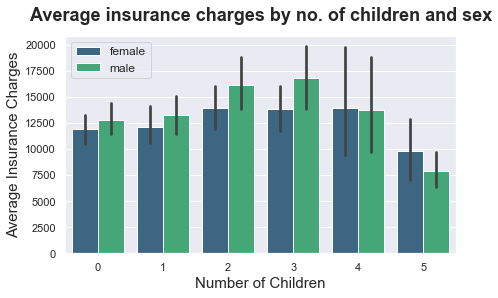

In [31]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='children', y='charges', hue='sex', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by no. of children and sex',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, loc='upper left')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

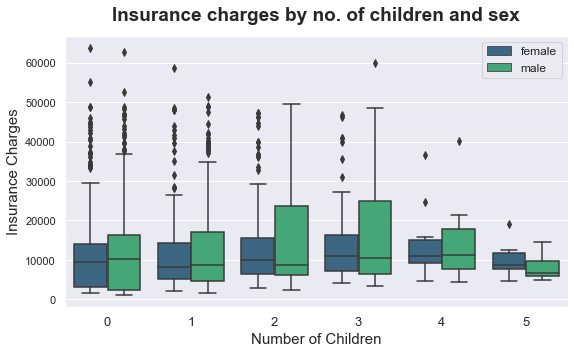

In [21]:
plt.figure(figsize = (9,5))
sns.set()
sns.boxplot(x="children", y="charges", hue="sex", data=df, palette='viridis')
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.legend(fontsize=12)
#,bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Insurance charges by no. of children and sex',fontsize=19,
             pad=15,weight='bold')
plt.xticks(fontsize=13)

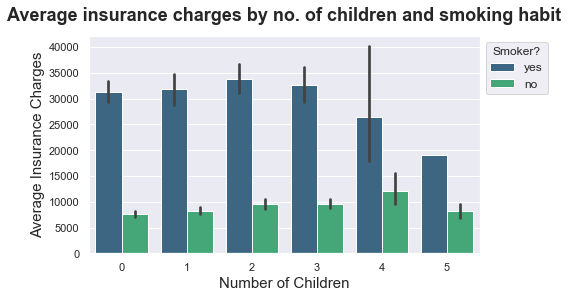

In [32]:
plt.figure(figsize = (7,4))
sns.set()
sns.barplot(x='children', y='charges', hue='smoker', data=df, 
                 estimator=np.mean, palette='viridis')
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Average Insurance Charges',fontsize=15)
plt.title('Average insurance charges by no. of children and smoking habit',fontsize=18,
             pad=15,weight='bold')
plt.legend(fontsize=12, title='Smoker?',
           loc='upper left',bbox_to_anchor=(1, 1))

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

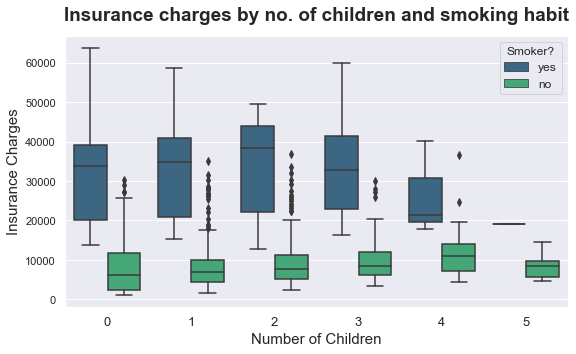

In [22]:
plt.figure(figsize = (9,5))
sns.set()
sns.boxplot(x="children", y="charges", hue="smoker", data=df, palette='viridis')
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Insurance Charges',fontsize=15)
plt.legend(title='Smoker?',fontsize=12)
#,bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Insurance charges by no. of children and smoking habit',fontsize=19,
             pad=15,weight='bold')
plt.xticks(fontsize=13)

# Analysis by feature correlation

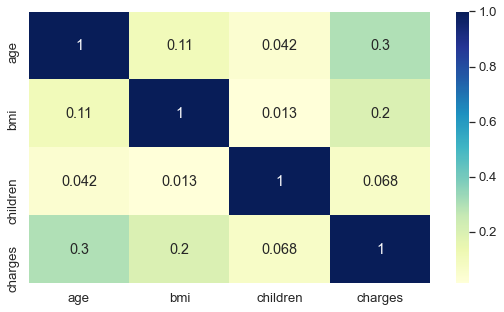

In [35]:
plt.figure(figsize = (9,5))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')